In [20]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import svm
import arrow

import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd

In [2]:
df = pd.read_csv("SHARADAR-Stock.csv")

In [3]:
df.head()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
0,XOM,9/21/2018,85.01,85.43,84.52,85.17,26196749,0.0,85.17,9/21/2018
1,XOM,9/20/2018,84.86,85.34,84.54,84.82,10621638,0.0,84.82,9/20/2018
2,XOM,9/19/2018,83.64,84.77,83.64,84.63,9787326,0.0,84.63,9/19/2018
3,XOM,9/18/2018,83.90,84.13,83.45,83.63,8799790,0.0,83.63,9/18/2018
4,XOM,9/17/2018,83.00,83.61,82.99,83.41,7898451,0.0,83.41,9/17/2018


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticker       10000 non-null  object 
 1   date         10000 non-null  object 
 2   open         10000 non-null  float64
 3   high         10000 non-null  float64
 4   low          10000 non-null  float64
 5   close        10000 non-null  float64
 6   volume       10000 non-null  int64  
 7   dividends    10000 non-null  float64
 8   closeunadj   10000 non-null  float64
 9   lastupdated  10000 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 781.4+ KB


In [5]:
df.describe()

,open,high,low,close,volume,dividends,closeunadj
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,63.206224,63.775191,62.640059,63.224055,1.380657e+07,0.005723,66.692552
std,17.927354,18.006411,17.862488,17.942976,8.799690e+06,0.051570,16.697951
min,28.375000,29.500000,28.315000,29.065000,1.735400e+06,0.000000,30.270000
25%,48.770000,49.317500,48.240000,48.767500,8.156538e+06,0.000000,52.720000
50%,59.545000,60.060000,58.965000,59.532500,1.128900e+07,0.000000,68.035000
75%,78.632500,79.332500,78.032500,78.750000,1.704400e+07,0.000000,80.870000
max,109.140000,109.980000,107.990000,109.550000,1.180235e+08,0.820000,109.550000


In [6]:
df.isnull().sum()

ticker         0
date           0
open           0
high           0
low            0
close          0
volume         0
dividends      0
closeunadj     0
lastupdated    0
dtype: int64

In [7]:
df=df[['open','high','low','close','volume']]
print (df.head())

    open   high    low  close    volume
0  85.01  85.43  84.52  85.17  26196749
1  84.86  85.34  84.54  84.82  10621638
2  83.64  84.77  83.64  84.63   9787326
3  83.90  84.13  83.45  83.63   8799790
4  83.00  83.61  82.99  83.41   7898451


In [8]:
df['HIGHLOW_PCT']=(df['high']-df['close'])/(df['close'])*100
df['PCT_Change']=(df['close']-df['open'])/(df['open'])*100
df=df[['close','HIGHLOW_PCT','PCT_Change','volume']]
display(df.head())

,close,HIGHLOW_PCT,PCT_Change,volume
0,85.17,0.305272,0.188213,26196749
1,84.82,0.613063,-0.047136,10621638
2,84.63,0.165426,1.183644,9787326
3,83.63,0.597872,-0.321812,8799790
4,83.41,0.239779,0.493976,7898451


In [9]:
import math

forecast_col = 'close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
print(forecast_out)
df['label'] = df[forecast_col].shift(-forecast_out)
print (df.head())

100
   close  HIGHLOW_PCT  PCT_Change    volume  label
0  85.17     0.305272    0.188213  26196749  76.95
1  84.82     0.613063   -0.047136  10621638  77.75
2  84.63     0.165426    1.183644   9787326  77.79
3  83.63     0.597872   -0.321812   8799790  80.86
4  83.41     0.239779    0.493976   7898451  79.50


In [10]:
df.tail()

,close,HIGHLOW_PCT,PCT_Change,volume,label
9995,46.50,2.150538,-0.128866,6339600,NaN
9996,46.69,2.398801,-1.973546,5696900,NaN
9997,47.25,0.931217,3.143418,5396500,NaN
9998,45.75,0.677596,1.666667,5844200,NaN
9999,46.19,2.294869,-0.794674,3053600,NaN


In [11]:
X = np.array(df.drop(['label'], axis=1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately=X[-forecast_out:]


df.dropna(inplace=True)
y=np.array(df['label'])

In [14]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [17]:
clf=svm.SVR()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print (accuracy)

0.8159037578473376


In [18]:
forecast_set=clf.predict(X_lately)
print (forecast_set,accuracy,forecast_out)

[55.4511191  60.71573551 53.73411889 55.49831775 57.45194642 52.97329468
 53.17874648 51.47574681 52.67602868 52.38952838 54.05054391 56.18386482
 55.23796469 54.34270892 58.67985517 52.90844284 60.86063518 55.83626505
 57.71693765 56.7376292  57.82693025 59.078822   55.97299288 63.58995876
 53.4133573  53.63356656 56.04686633 54.77041343 56.68260467 55.83356098
 58.98320387 56.00506072 54.88562383 58.26146848 55.13836608 55.12013441
 54.85678652 59.20916793 53.42496892 50.08169477 57.36881055 57.8964311
 52.32721319 55.4747403  57.11355224 56.40376386 57.05177031 58.87853923
 58.67025661 59.76650629 57.21617513 54.27771446 59.5272515  55.89978232
 59.86378838 59.09247757 61.98211064 61.09601331 60.41015412 60.01253853
 58.64664416 58.56101263 58.79770073 61.92067408 57.79909321 59.71293467
 59.48120063 55.65010432 52.8109478  53.27682645 52.64370207 54.41463211
 54.11582425 53.72169592 54.5170331  56.96003593 61.92951671 51.29883334
 46.99191703 52.02992357 47.65123867 51.56629105 52.

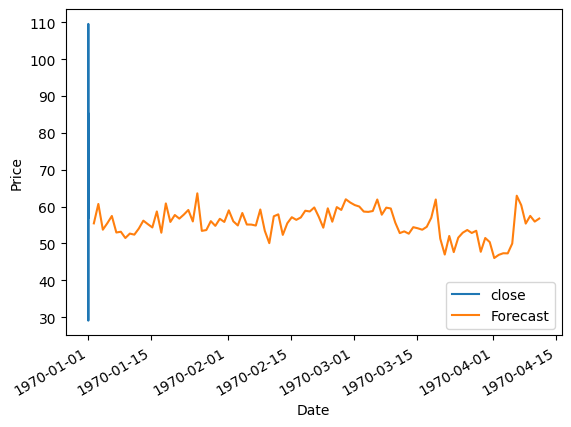

In [23]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

df['Forecast'] = np.nan

# make sure index is datetime
df.index = pd.to_datetime(df.index)

last_date = df.iloc[-1].name              # last index value (Timestamp)
last_unix = last_date.timestamp()         # convert to unix time (seconds)
one_day = 86400                           # seconds in a day
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)  # convert back to datetime
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

# Plot
df['close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


# -------------------------------------------xxx--------------------------------------------